# Plot generation routines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from typing import List

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [10, 7]

In [3]:
def make_histogram(path: str, title: str, save_path: str):
    data = np.load(path)
    plt.hist(data, bins=50)
    plt.xlabel('score')
    plt.ylabel('frequency')
    plt.title(title)
    plt.savefig(save_path)

In [4]:
def make_plots(paths: List[str], legend: List[str], title: str, save_path: str,
               show_tops: bool = False, solved_at: float = None):
    
    def max_values(array):
        maxes = [array[0]]
        for i in array[1:]:
            if maxes[-1] < i:
                maxes.append(i)
            else:
                maxes.append(maxes[-1])
        return maxes
    
    fig, ax = plt.subplots()
    
    for path in paths:
        
        if path[-1] != '/':
            path += '/'
            
        meds = np.load(f'{path}array_med.npy')
        highs = np.load(f'{path}array_high.npy')
        lows = np.load(f'{path}array_low.npy')
        epochs = range(len(meds))
        
        if show_tops:
            meds = max_values(meds)
            highs = max_values(highs)
            lows = max_values(lows)
        
        ax.plot(epochs, meds)
        ax.fill_between(epochs, lows, highs, alpha=0.3)
    
    if solved_at is not None:
        ax.plot(epochs, [solved_at for _ in epochs], '--r')
        legend.insert(len(legend) // 2, 'solved at level')
    
    ax.legend(legend, loc='lower right')
    ax.set_xlabel('epoch')
    ax.set_ylabel('score')
    ax.set_title(title)
    fig.savefig(save_path)

## Plots

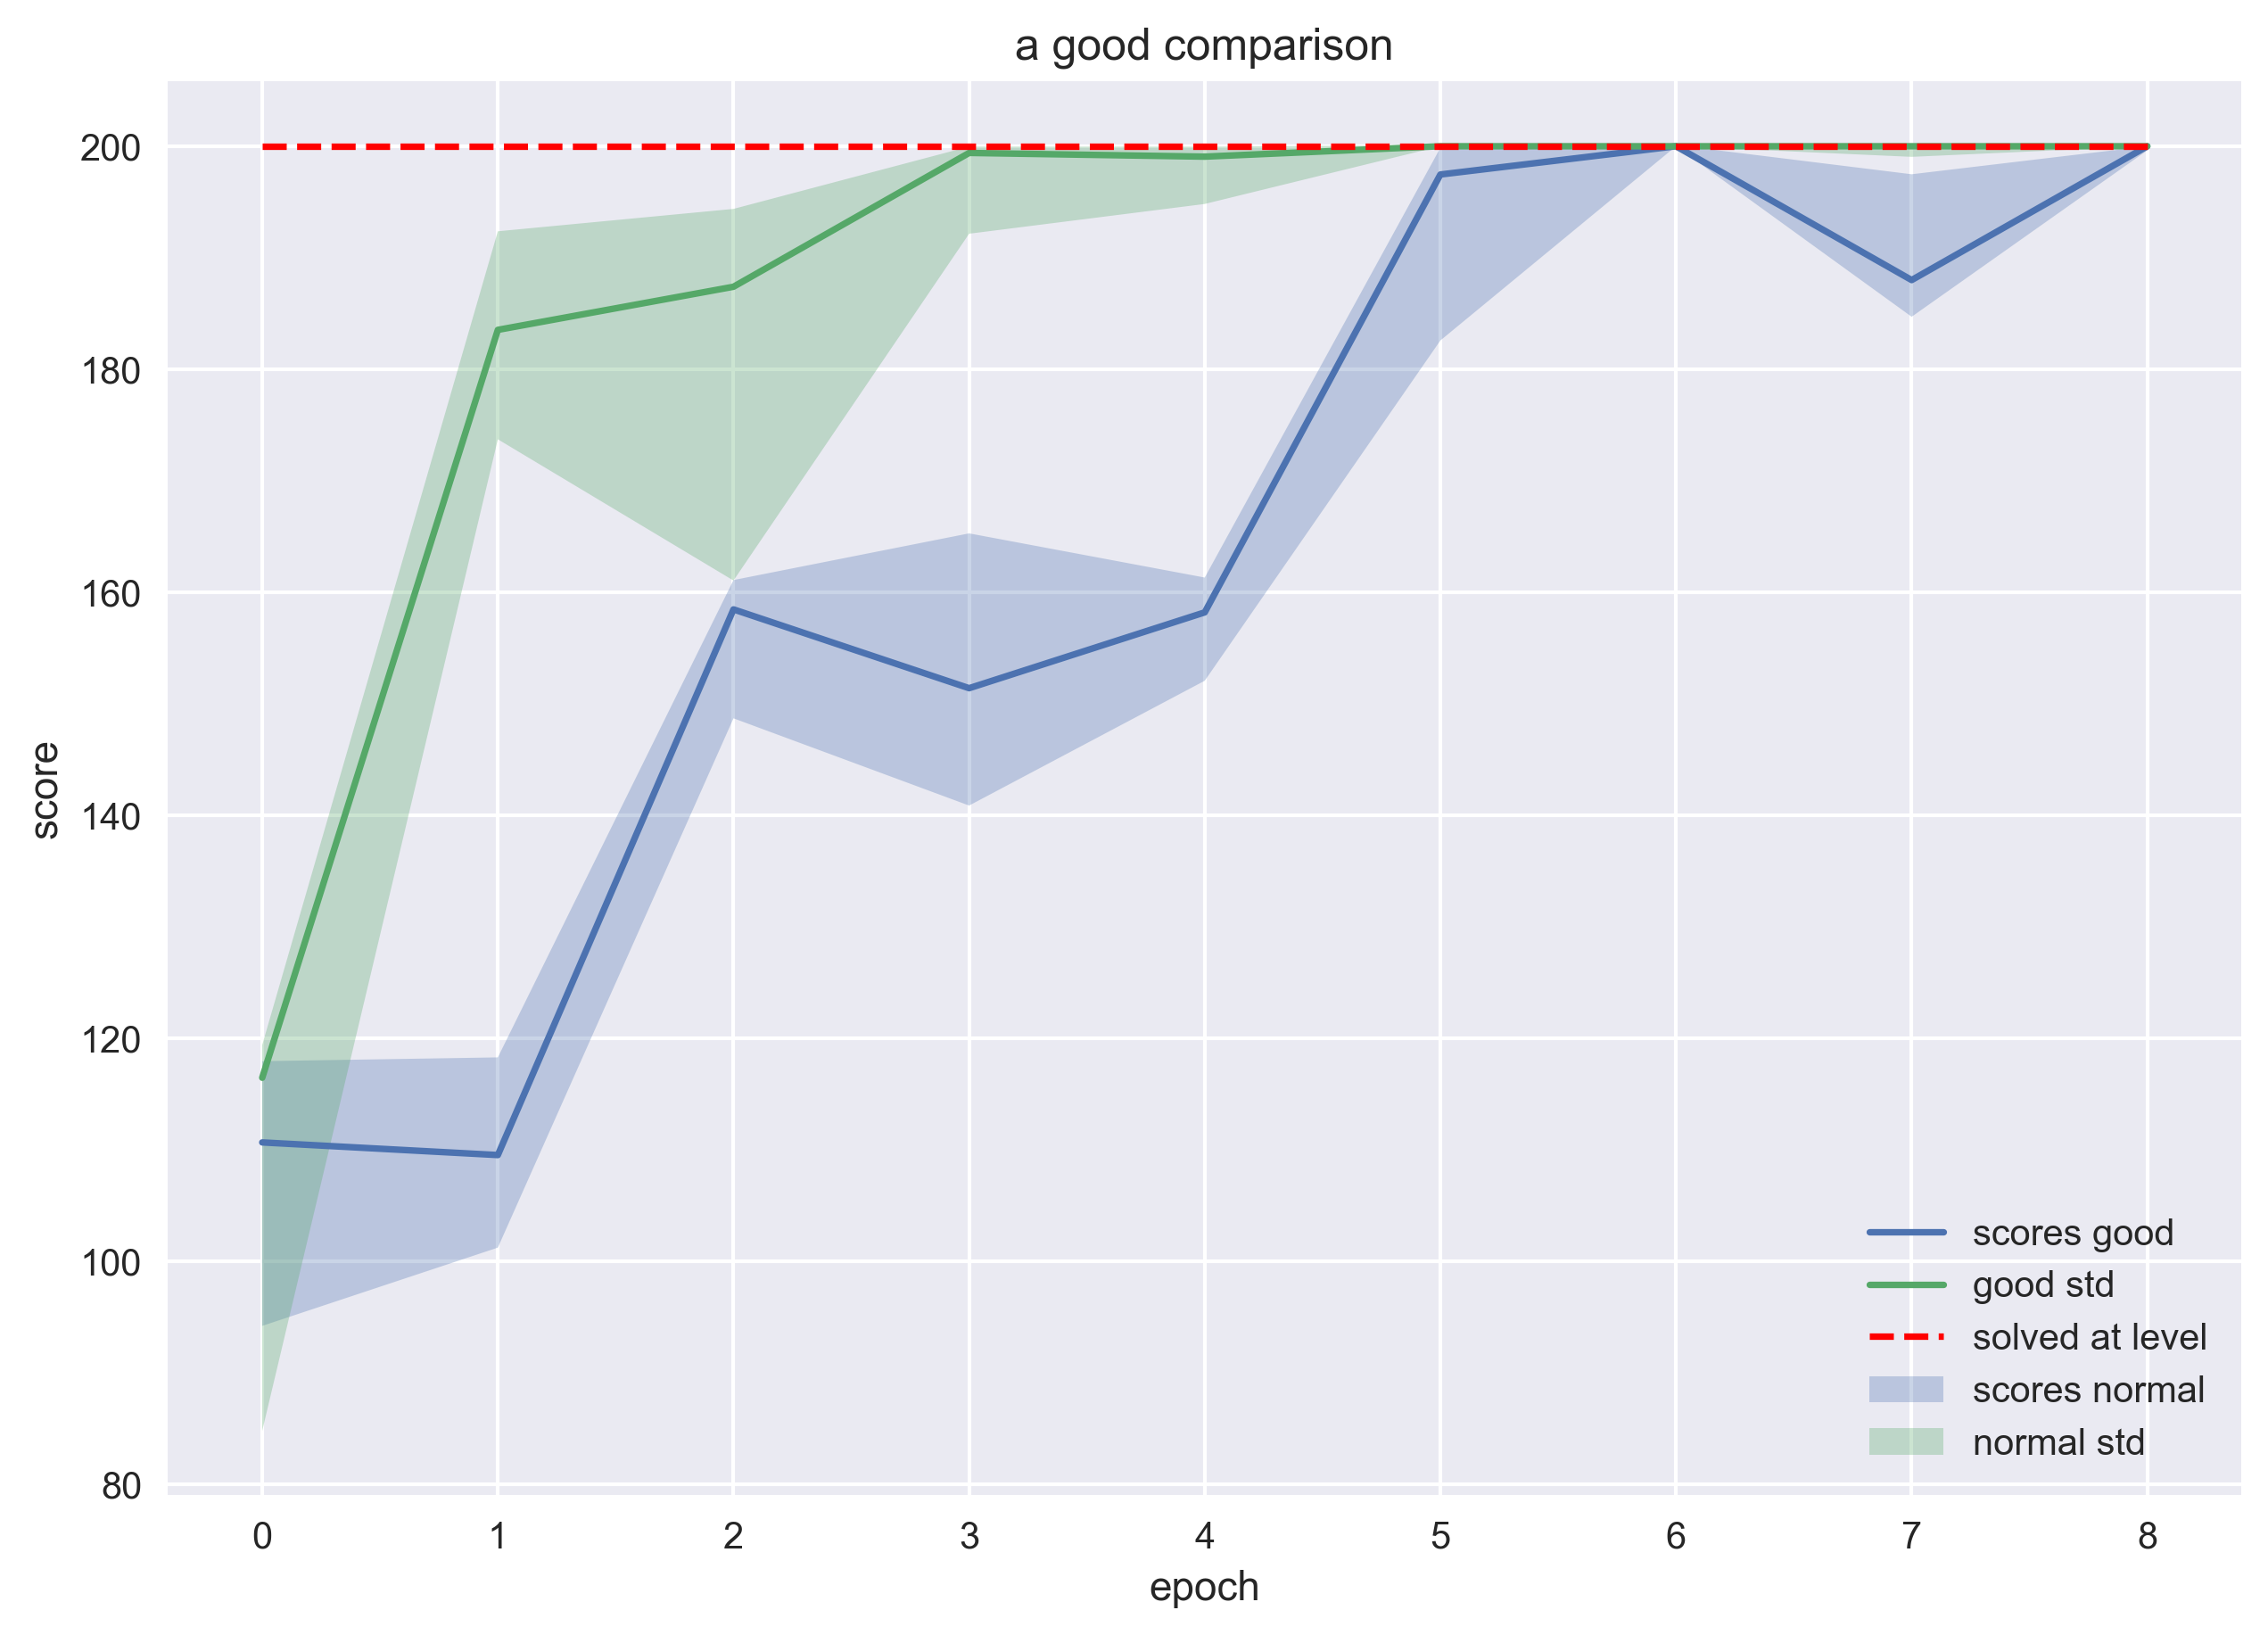

In [5]:
basePath = '/Users/mateusz/PycharmProjects/uber-rl/'
name_1 = 'experiment-2021-03-21--15-21'
name_2 = 'experiment-2021-03-21--22-21'
legend = ['scores good', 'good std','scores normal', 'normal std']
title = 'a good comparison'
save_path = 'cart_pole.png'

make_plots([basePath + name_1, basePath + name_2], legend, title, save_path, solved_at = 200.)

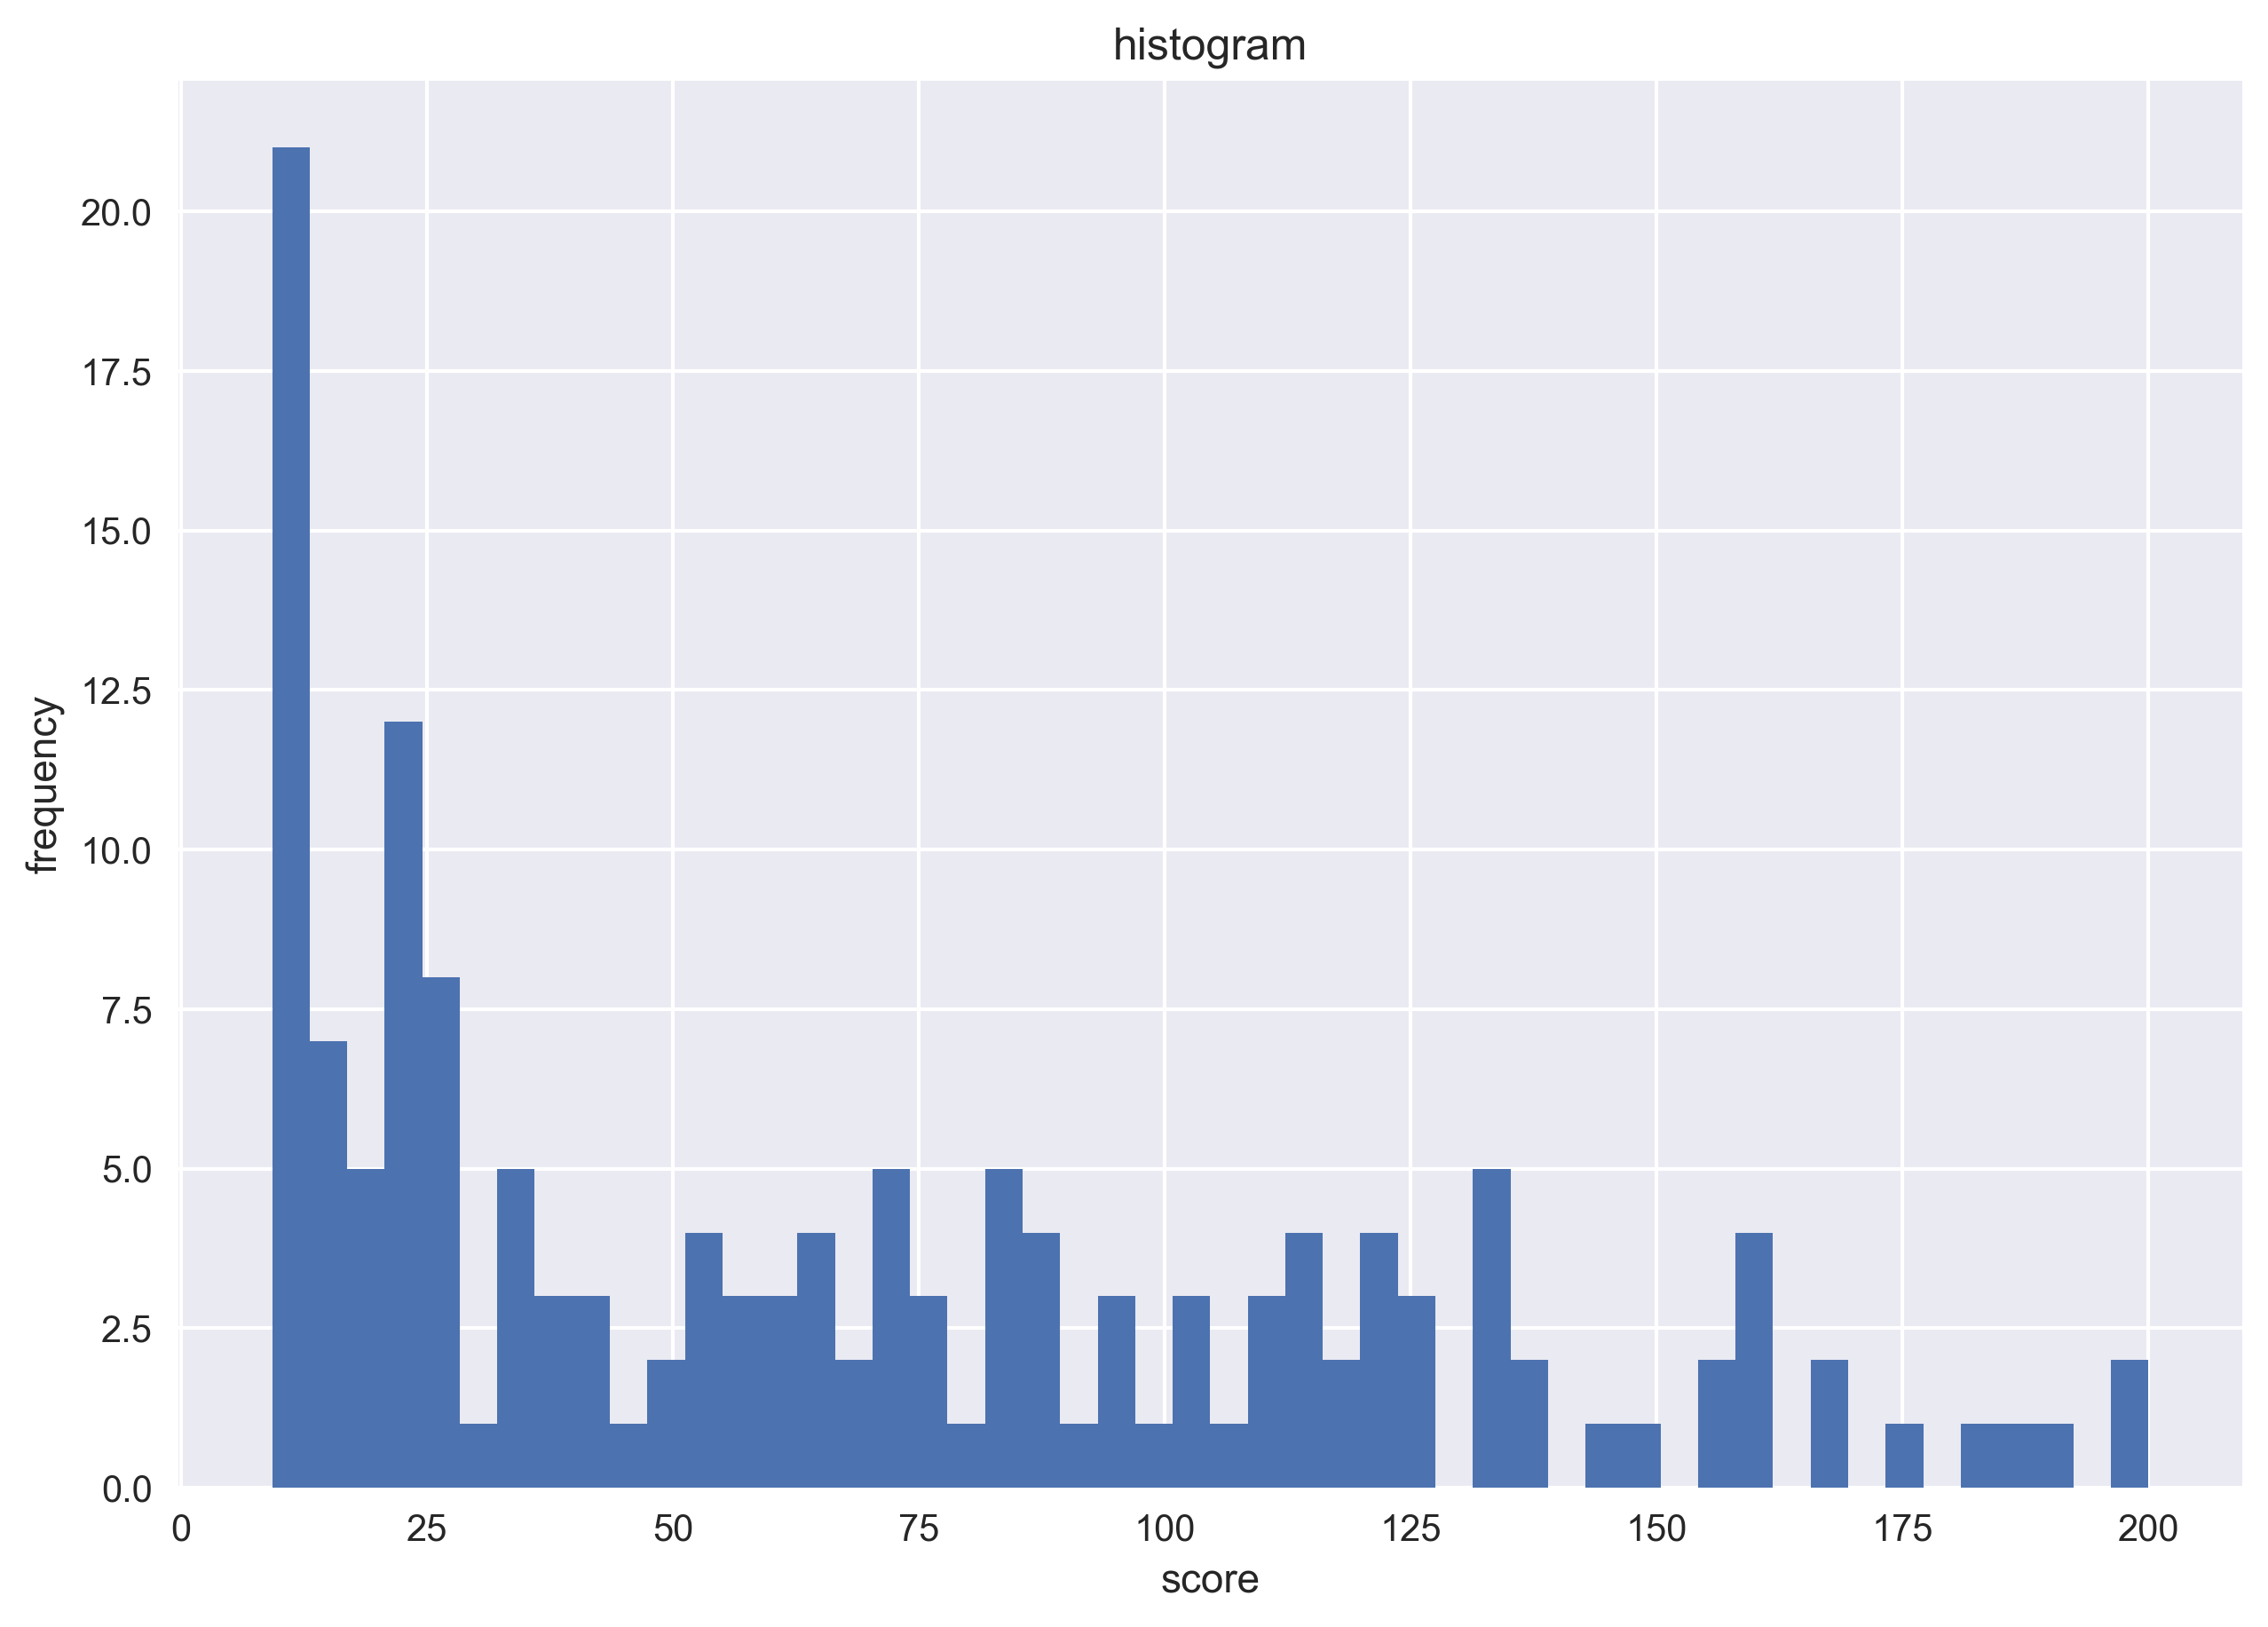

In [6]:
make_histogram('/Users/mateusz/PycharmProjects/uber-rl/experiment-2021-03-21--15-21/scores_6_deme_b9c7ebde-8a50-11eb-b40c-a45e60d1e7af.npy', 'histogram', 'hist.png');

## LunarLander

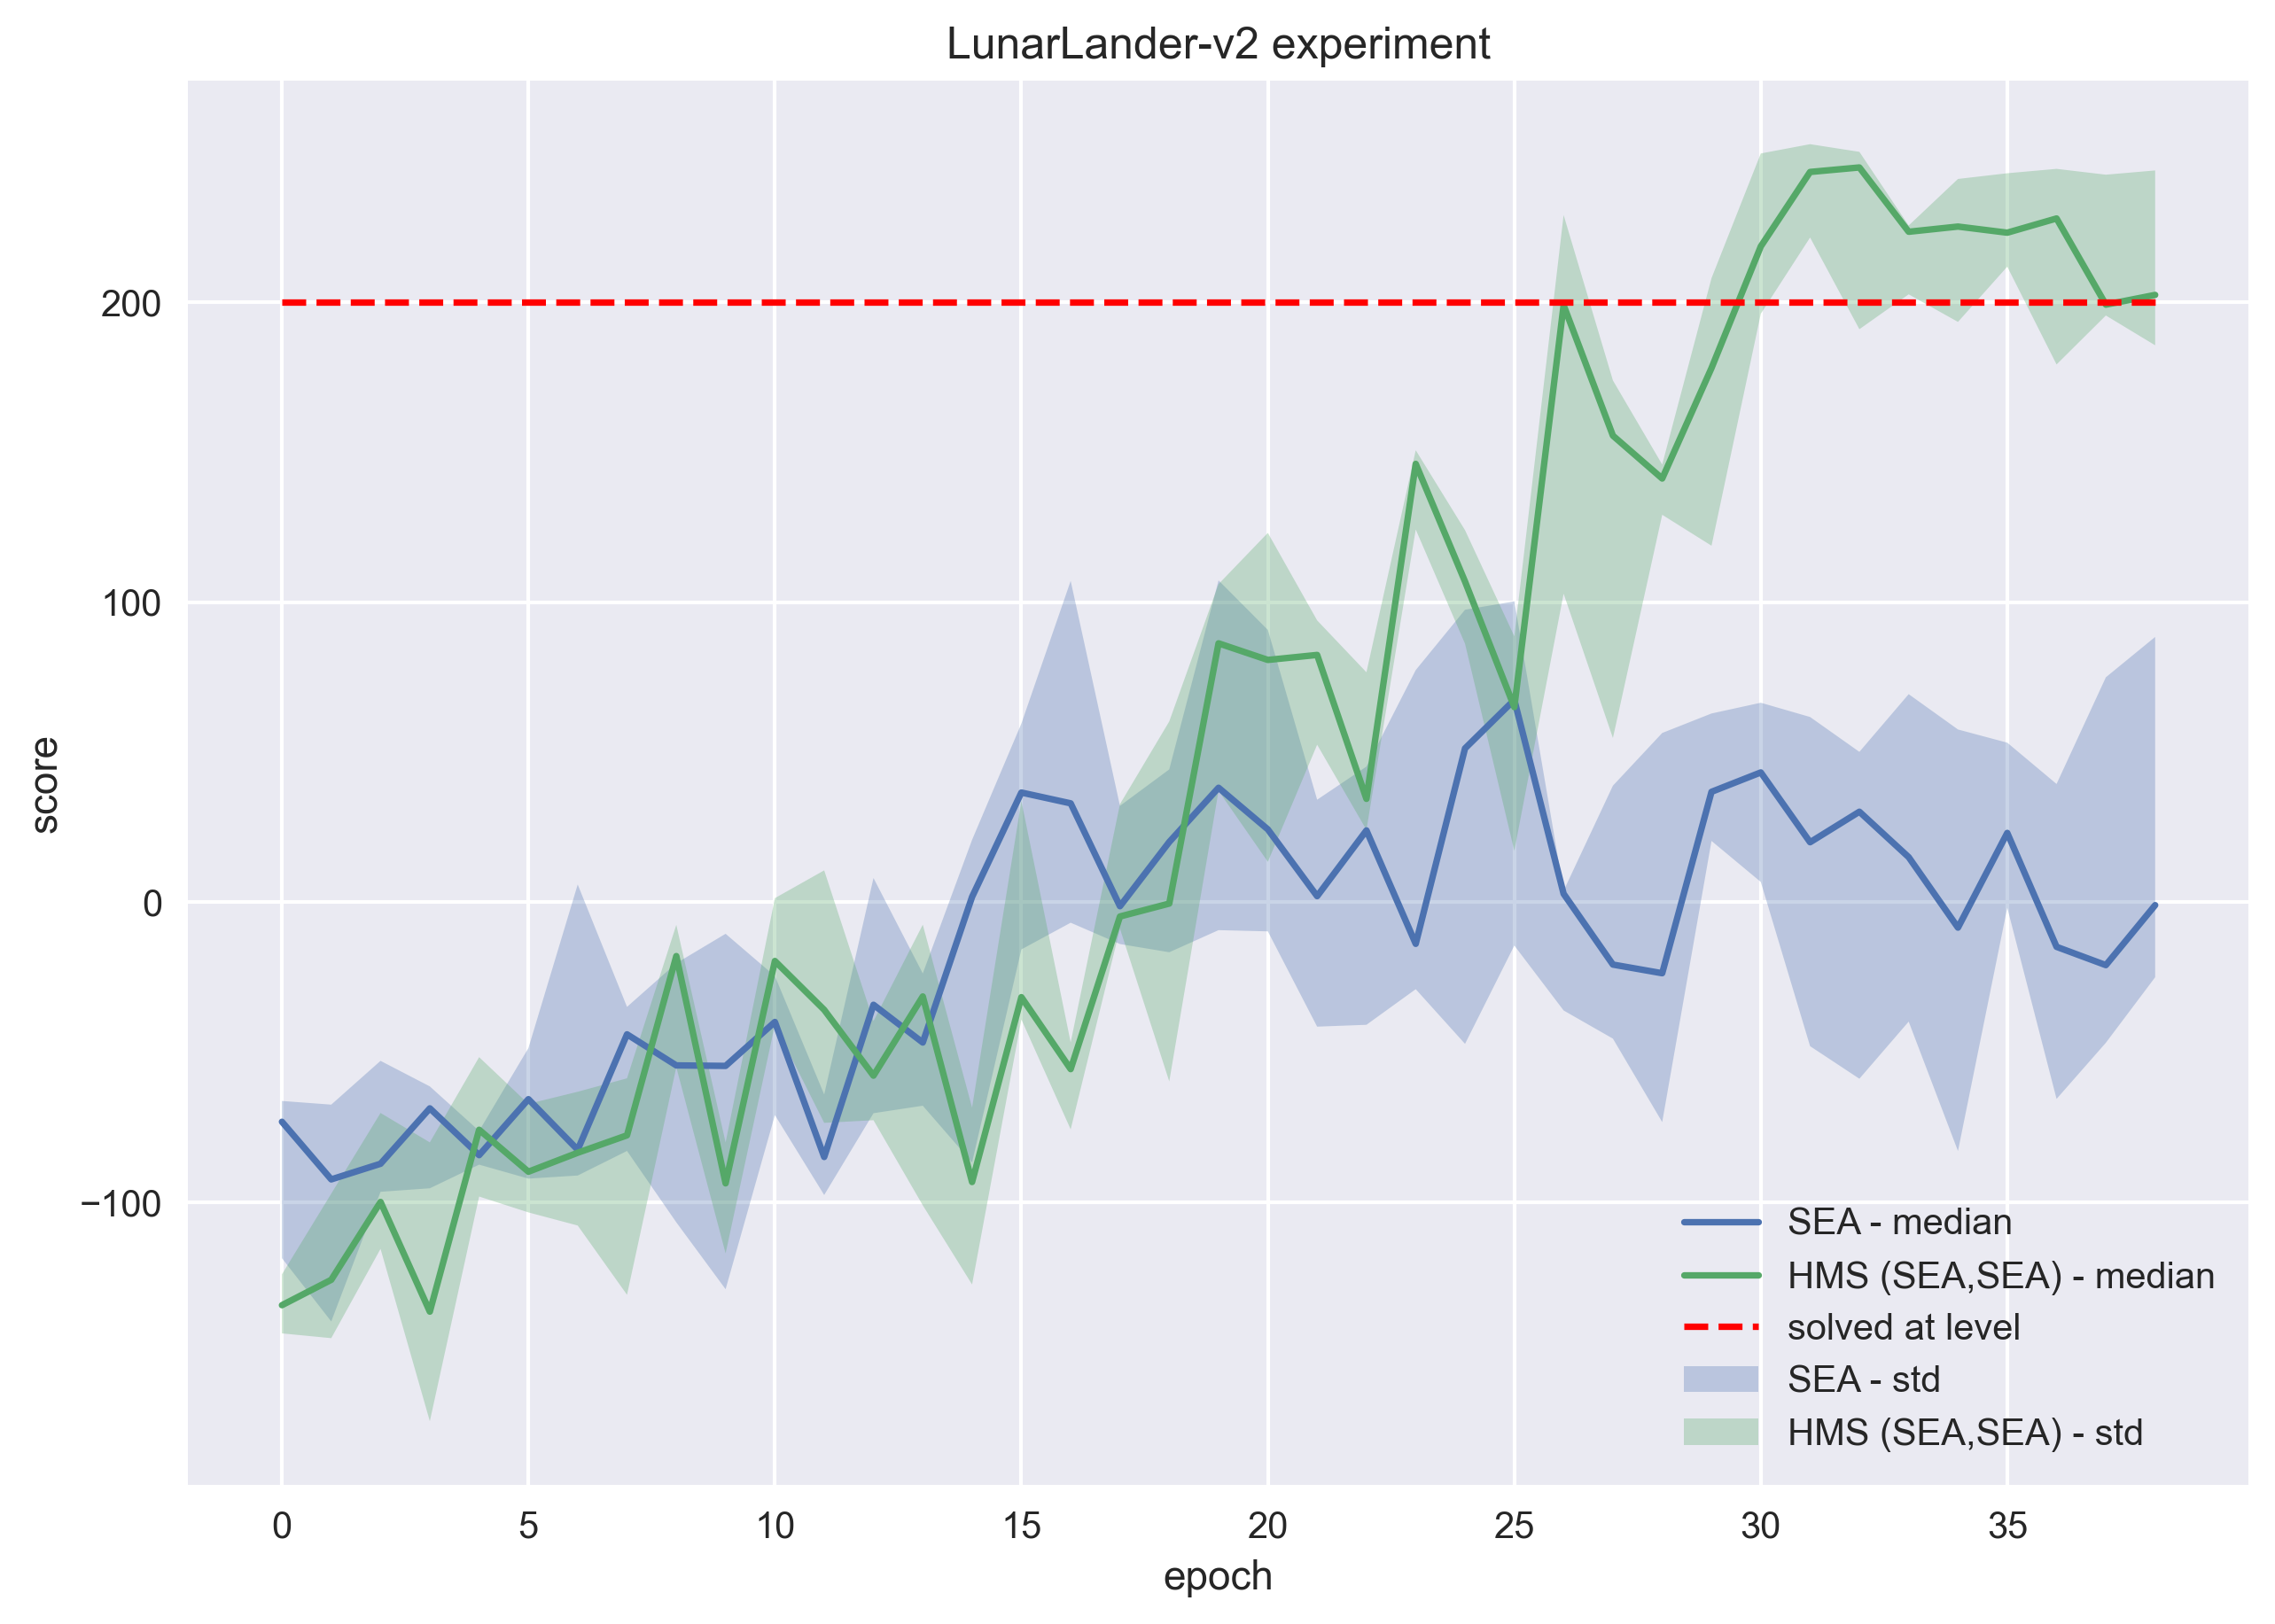

In [7]:
basePath = '/Users/mateusz/Desktop/final/'
name_1 = 'experiment-2021-03-21--16-44'
name_2 = 'experiment-2021-03-21--18-34'
legend = ['SEA - median', 'HMS (SEA,SEA) - median', 'SEA - std', 'HMS (SEA,SEA) - std']
title = 'LunarLander-v2 experiment'
save_path = 'lunar_lander.png'

make_plots([basePath + name_1, basePath + name_2], legend, title, save_path, solved_at = 200.)

## Atari Frostbite

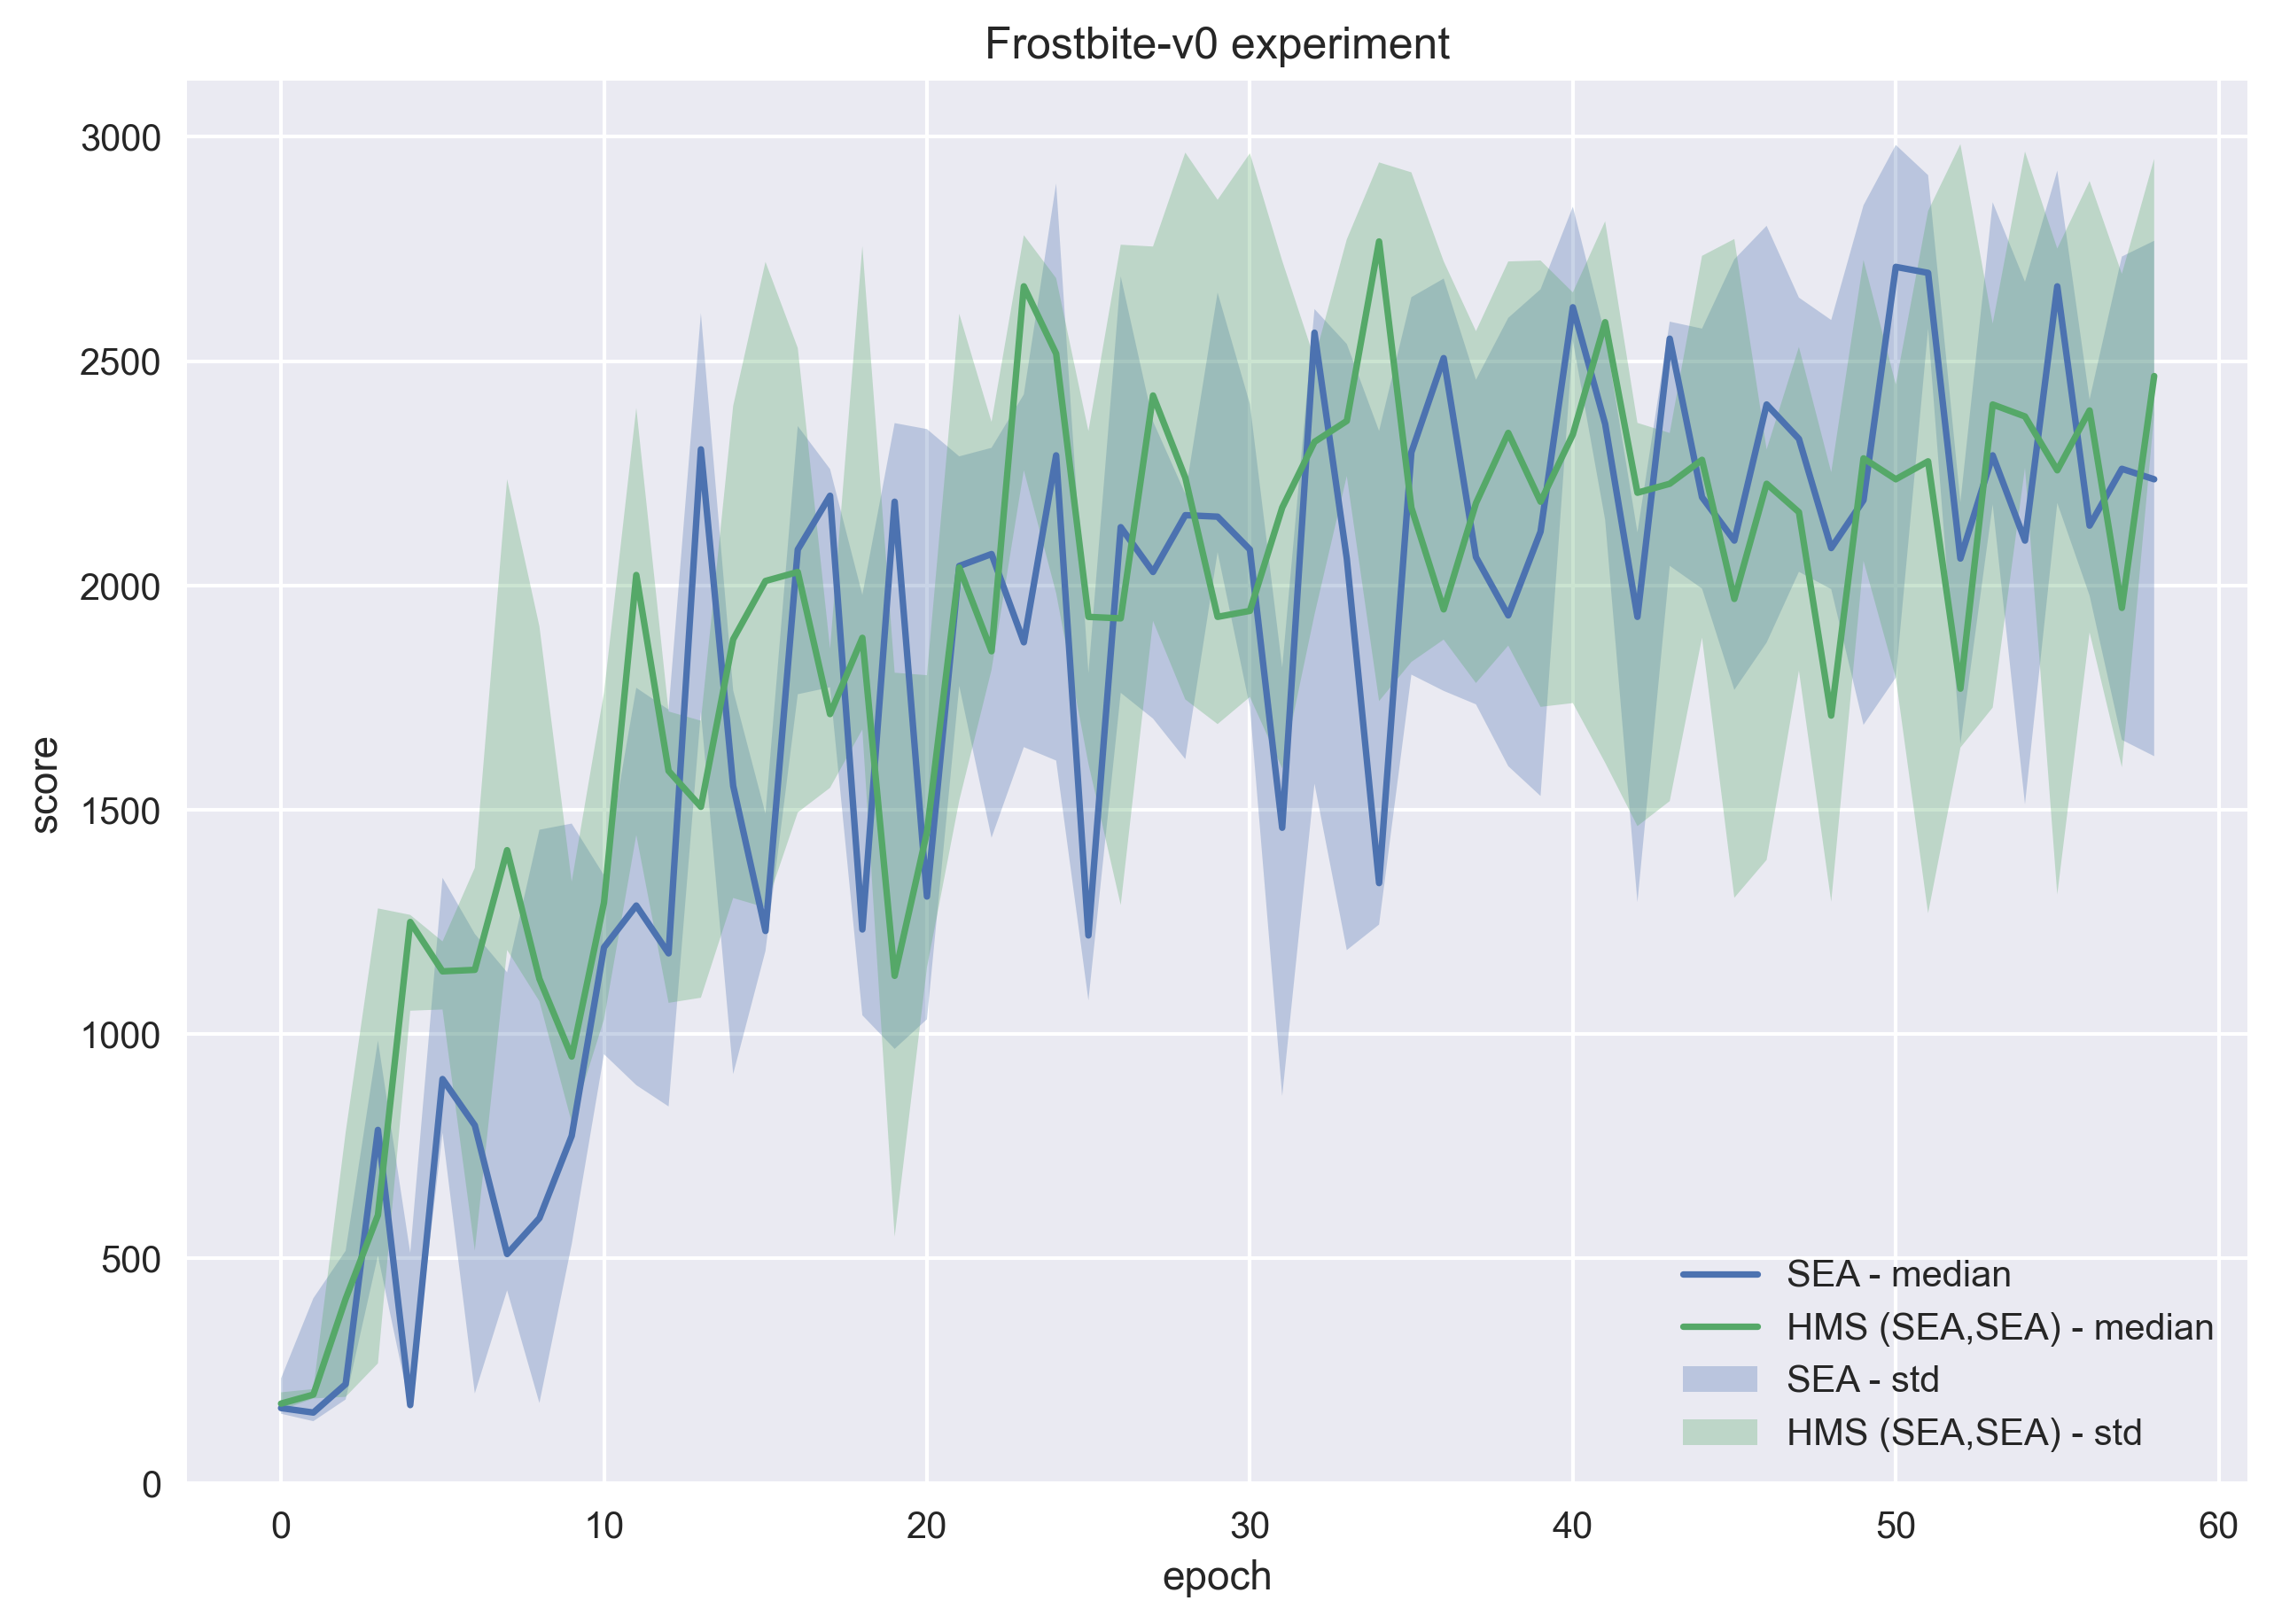

In [8]:
basePath = '/Users/mateusz/Downloads/'
name_1 = 'atari_0'
name_2 = 'atari_1'
legend = ['SEA - median', 'HMS (SEA,SEA) - median', 'SEA - std', 'HMS (SEA,SEA) - std']
title = 'Frostbite-v0 experiment'
save_path = 'atari_frostbite.png'

make_plots([basePath + name_1, basePath + name_2], legend, title, save_path)

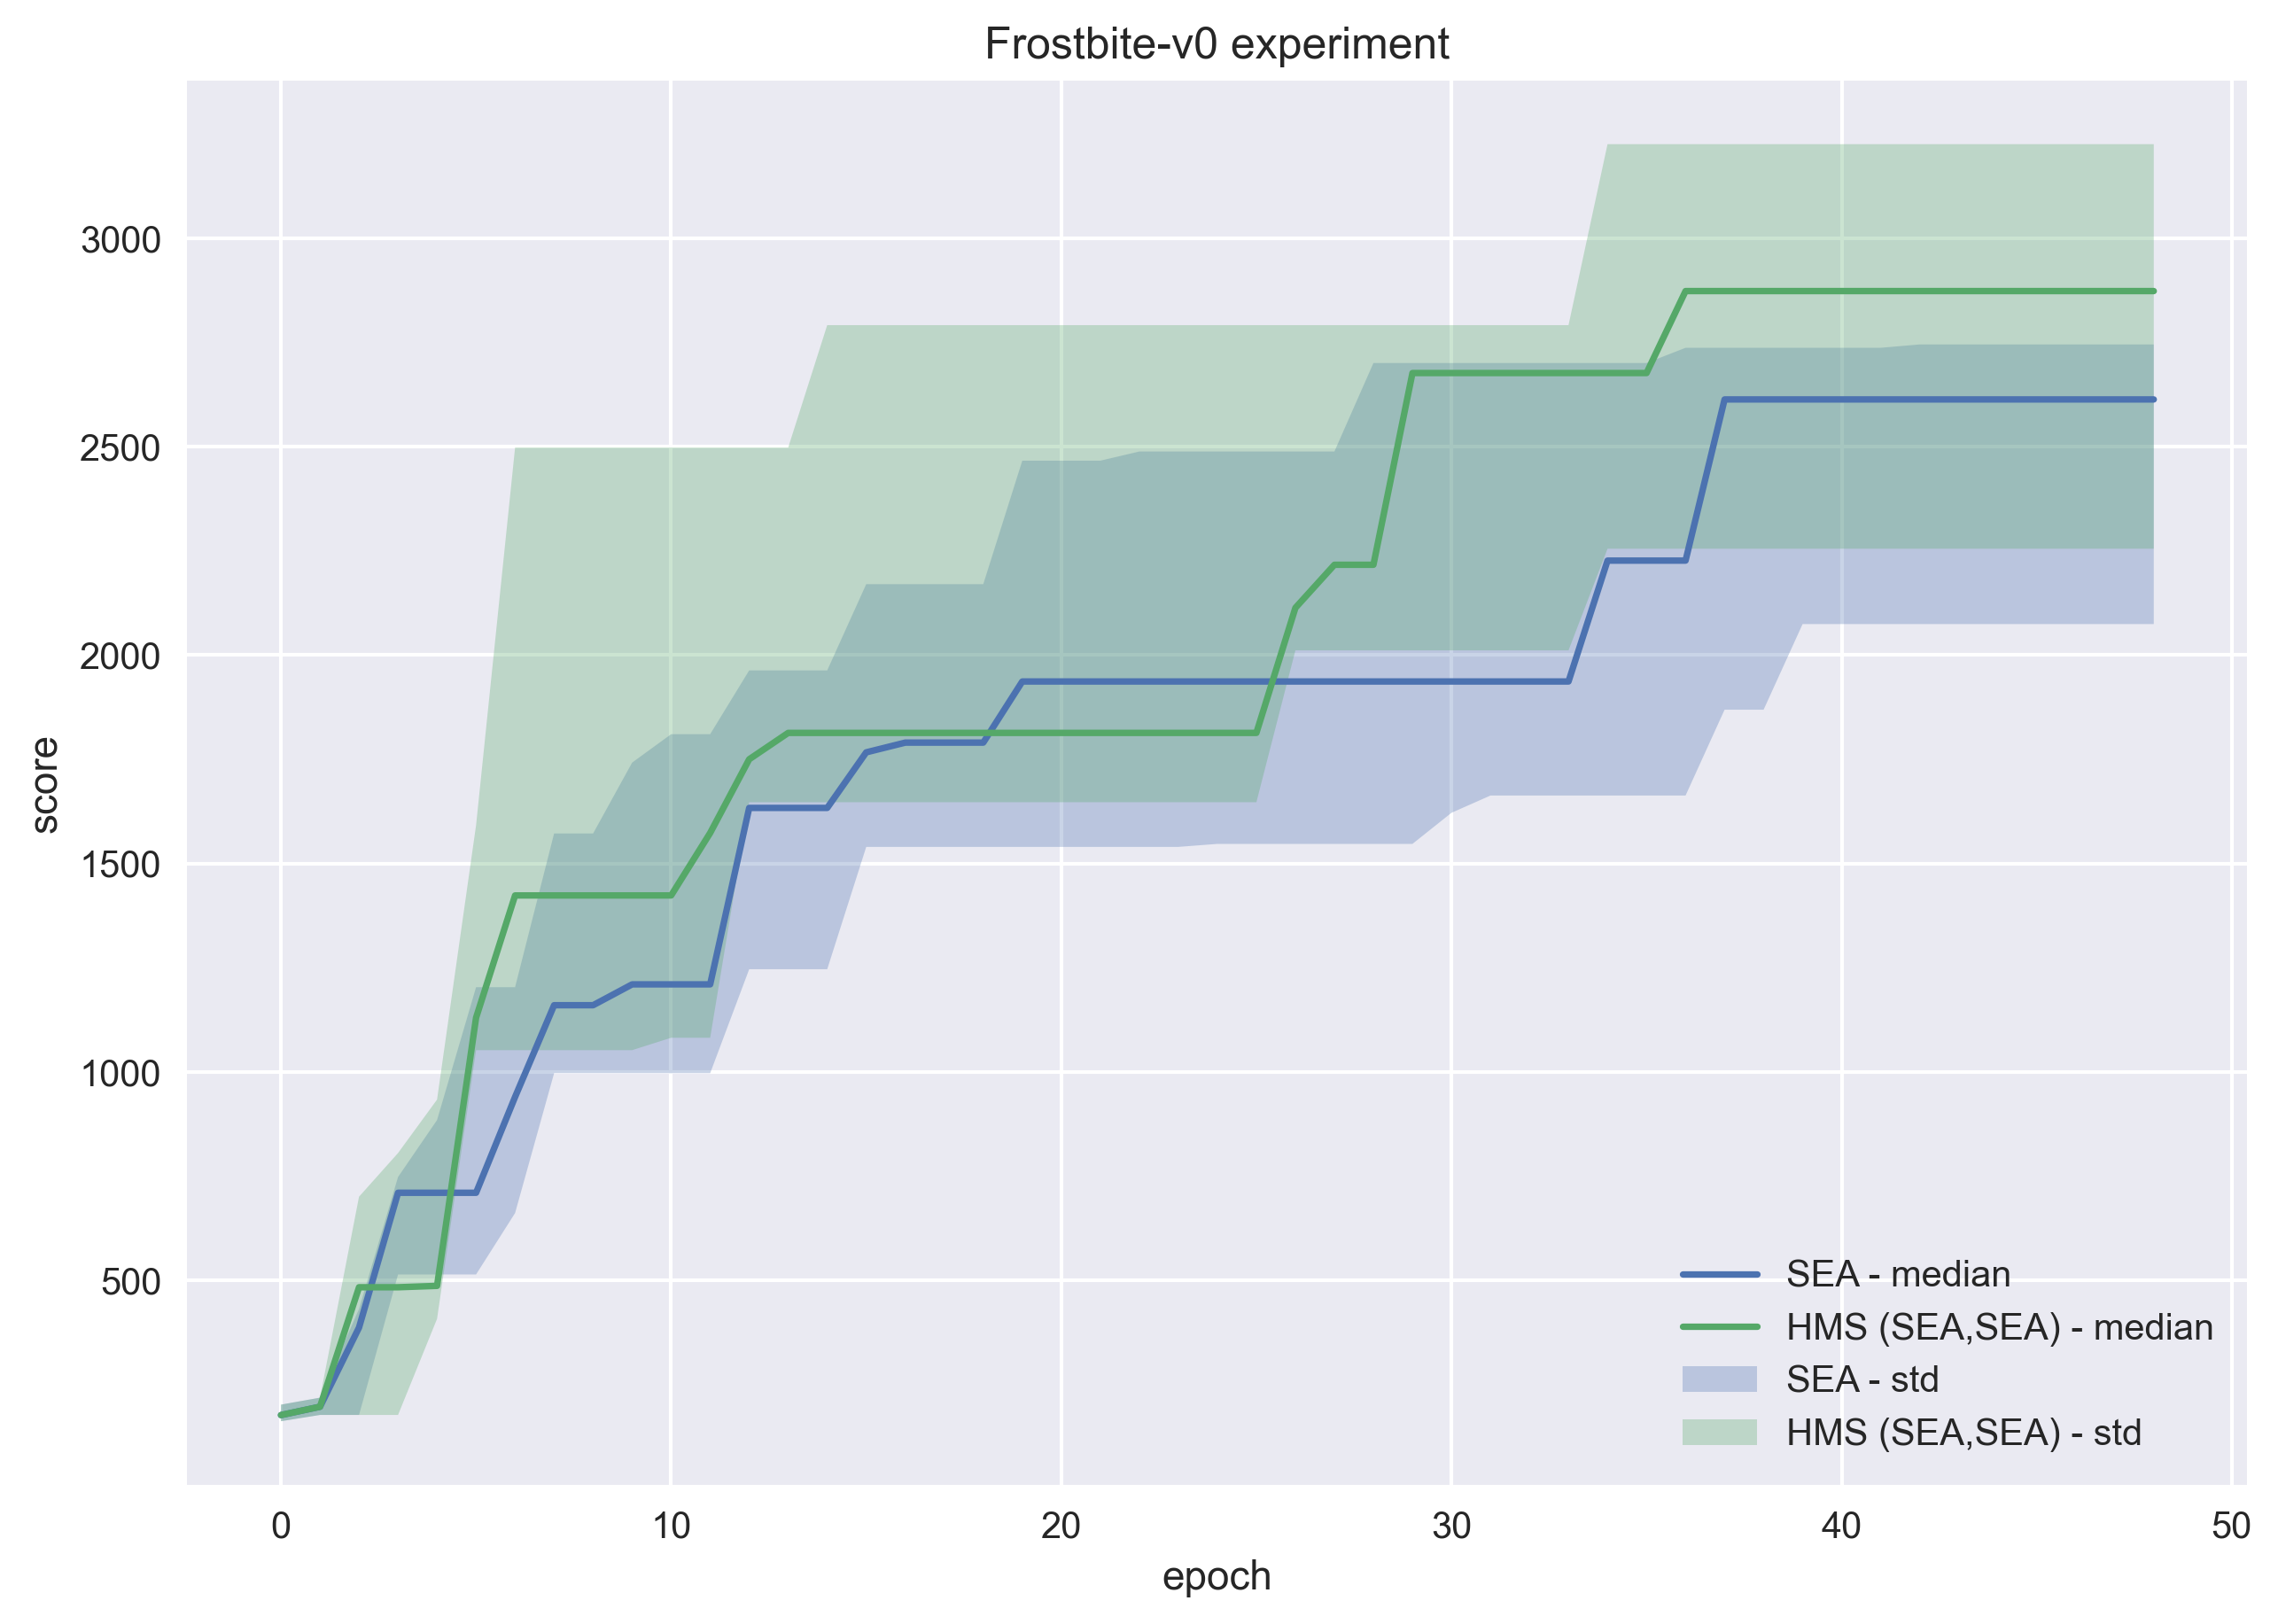

In [15]:
basePath = '/Users/mateusz/Downloads/'
name_1 = 'final_atari_0'
name_2 = 'final_atari_1'
legend = ['SEA - median', 'HMS (SEA,SEA) - median', 'SEA - std', 'HMS (SEA,SEA) - std']
title = 'Frostbite-v0 experiment'
save_path = 'atari_frostbite.png'

make_plots([basePath + name_1, basePath + name_2], legend, title, save_path, show_tops=True)

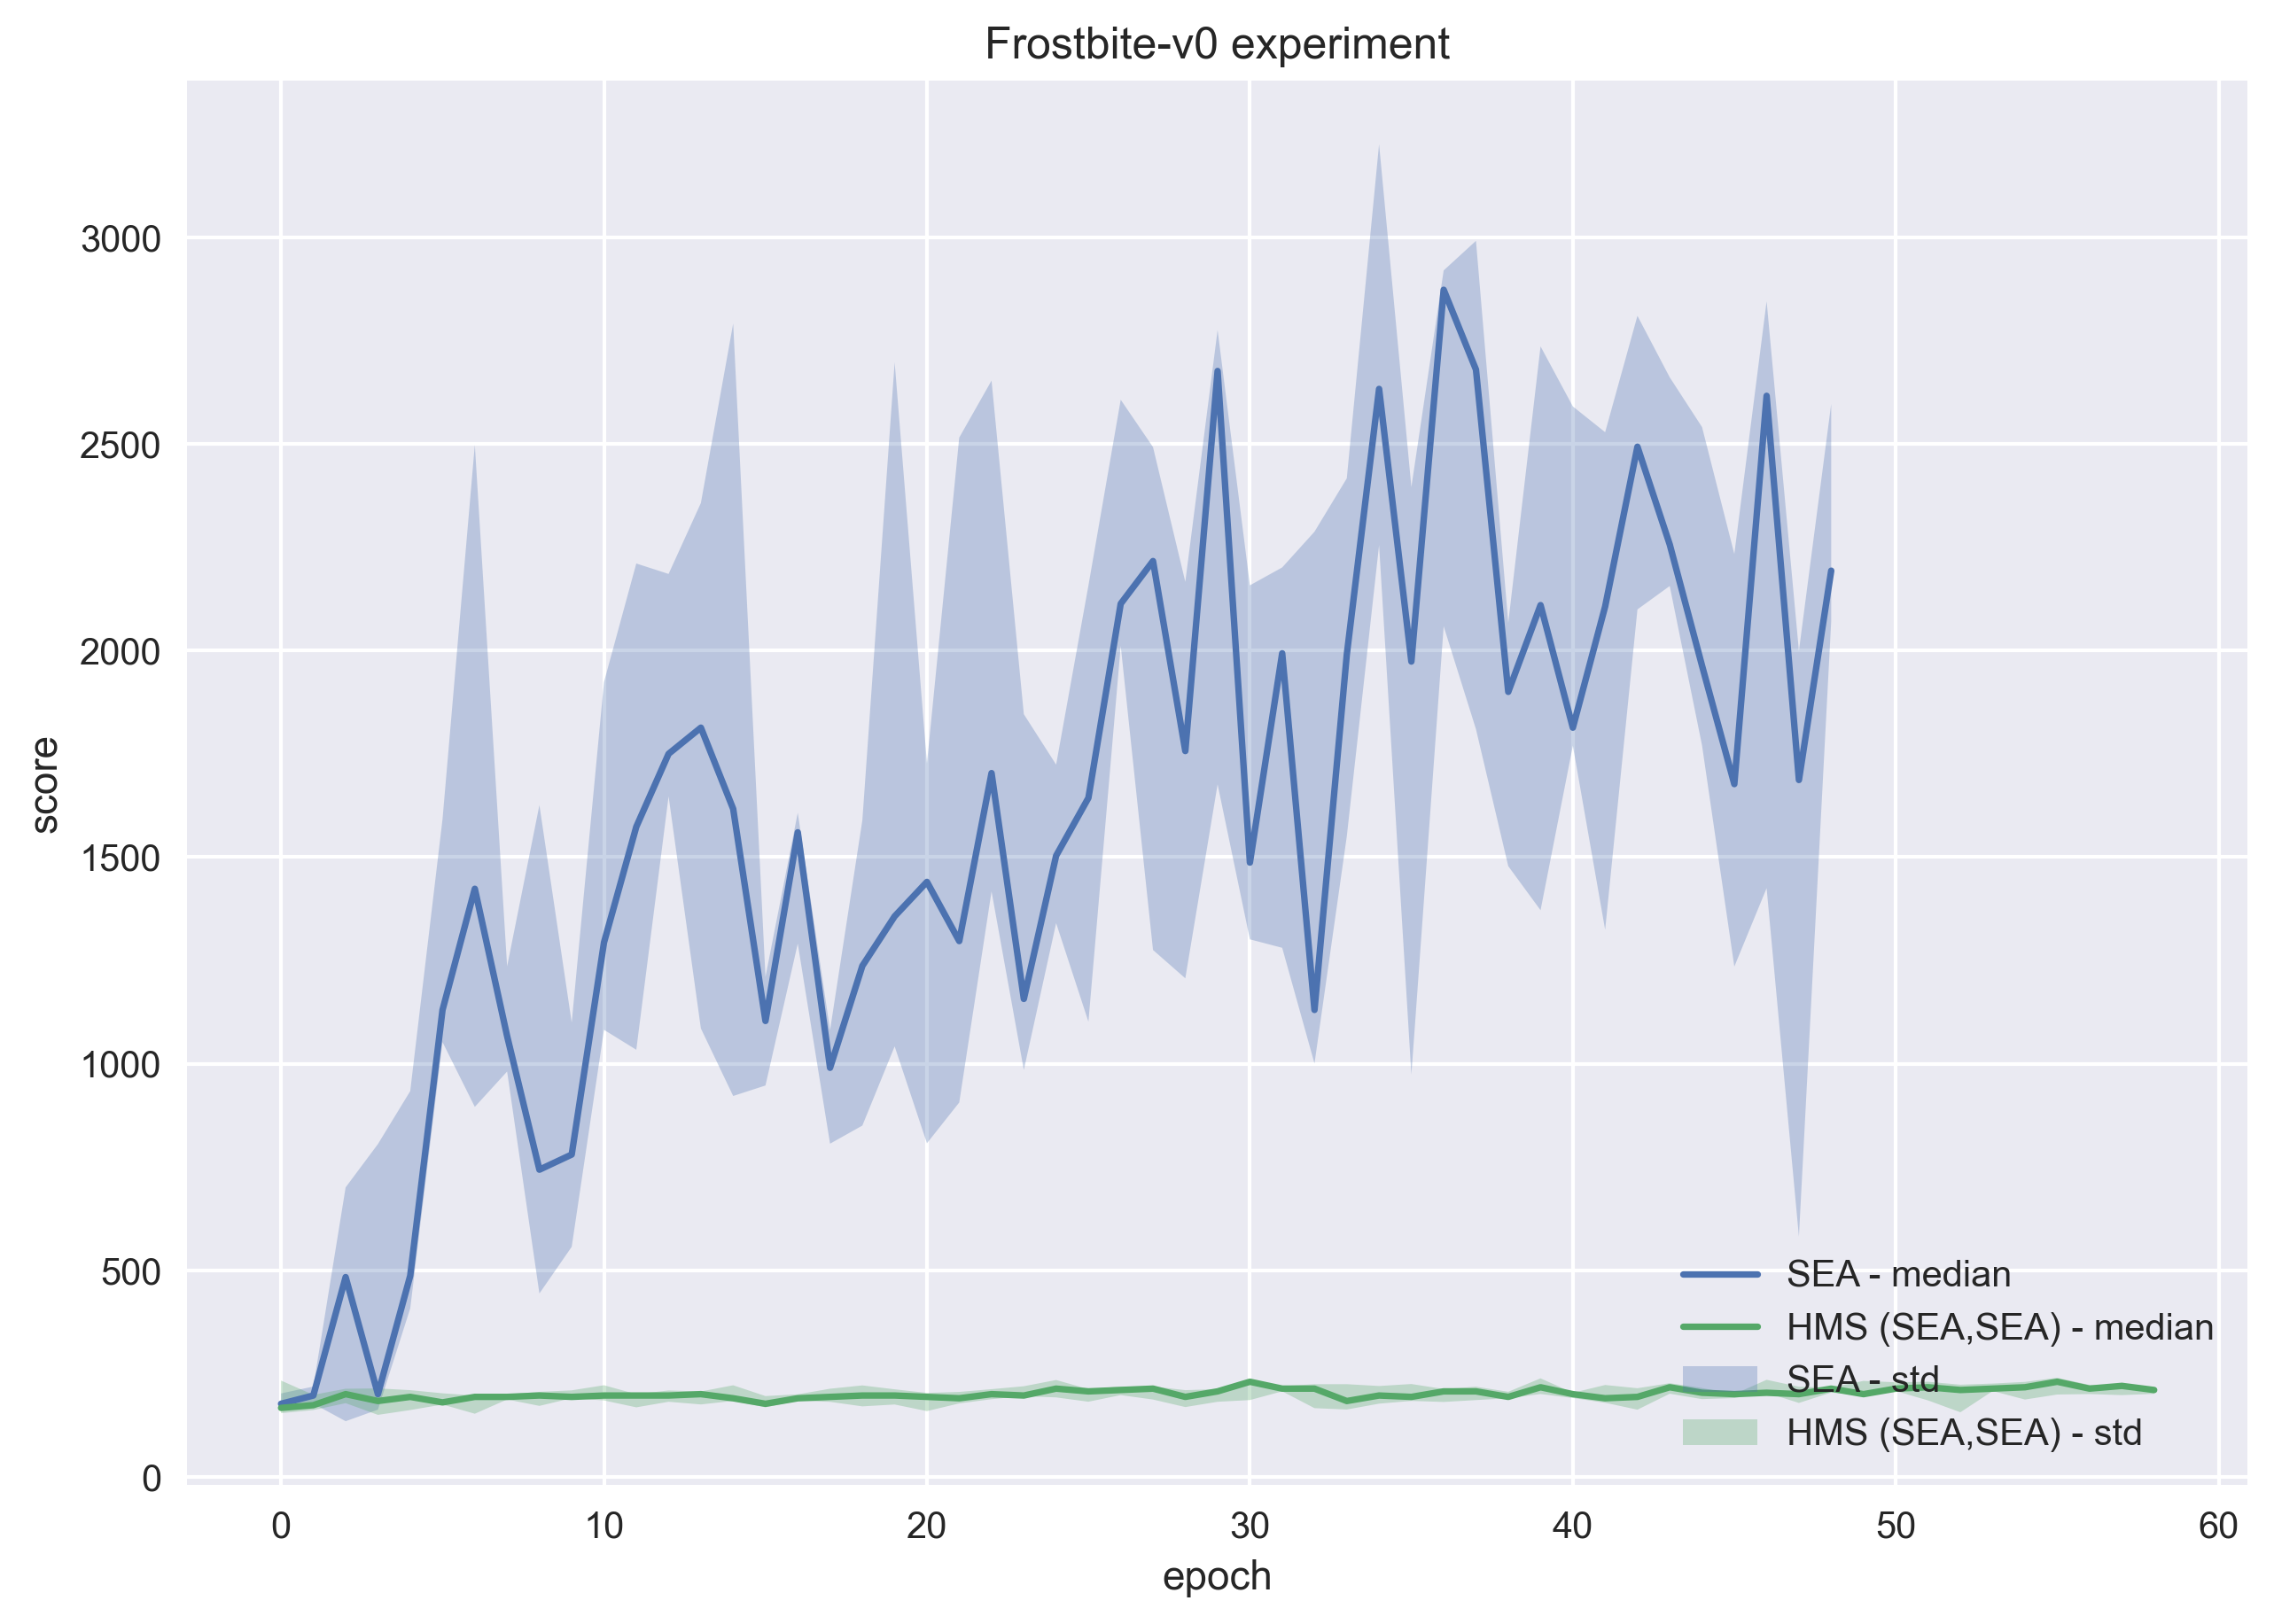

In [16]:
basePath = '/Users/mateusz/Downloads/'
name_1 = 'final_atari_1'
name_2 = ''
legend = ['SEA - median', 'HMS (SEA,SEA) - median', 'SEA - std', 'HMS (SEA,SEA) - std']
title = 'Frostbite-v0 experiment'
save_path = 'atari_frostbite.png'

make_plots([basePath + name_1, basePath + name_2], legend, title, save_path, show_tops=False)